In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
import numpy as np
import math

In [151]:
titanic_data=pd.read_csv("TITANI DATASET/train.csv")

In [152]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
titanic_data.shape


(891, 12)

In [154]:
titanic_data["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 1. analysing dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

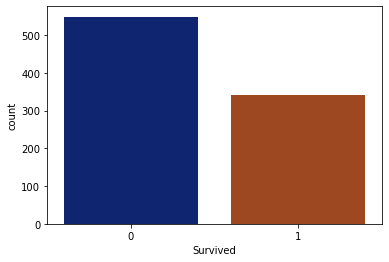

In [155]:
#pictorial representation of the ratio of survived people
sea.countplot(x="Survived", data=titanic_data, palette='dark')
#0 represents the dead and 1 represents those who survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

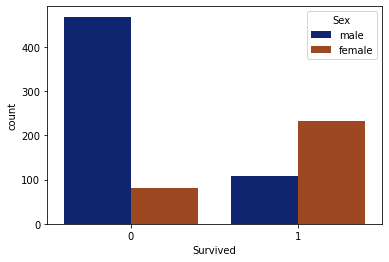

In [156]:
# no.of men and women those survived
sea.countplot(x="Survived", hue="Sex", data=titanic_data, palette="dark")

<AxesSubplot:xlabel='Survived', ylabel='count'>

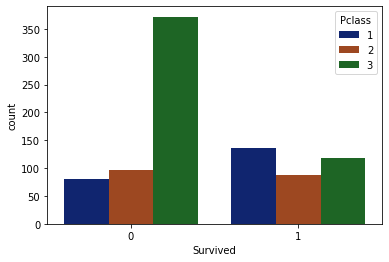

In [157]:
#plot between the survived people of respective class
sea.countplot(x="Survived", hue="Pclass", data=titanic_data, palette="dark")
#the plot shows that the people who belonged to the 1st class have more survivals and the people those belonged to 
# 3rd class were more dead

<AxesSubplot:ylabel='Frequency'>

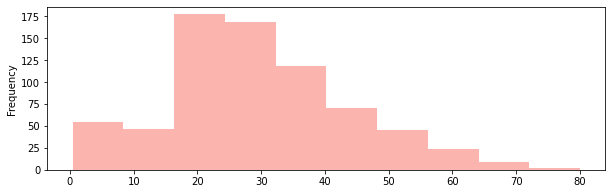

In [158]:
# histogram, representing the diff age groups that were inside the ship
#the colormap is chosen from the matplotlib library
titanic_data["Age"].plot.hist(colormap="Pastel1", figsize=(10,3))
#this shows that there were more yound people as compared to any other age group

In [159]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Frequency'>

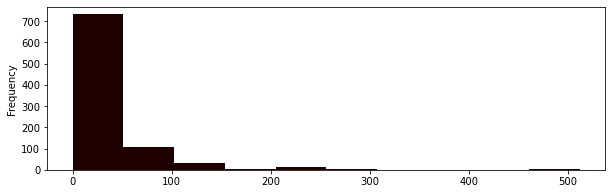

In [160]:
titanic_data["Fare"].plot.hist(colormap="pink", figsize=(10,3))

<AxesSubplot:xlabel='Embarked', ylabel='count'>

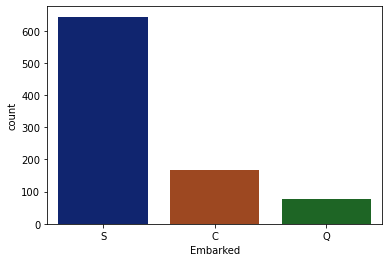

In [161]:
sea.countplot(x="Embarked", data=titanic_data, palette="dark")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

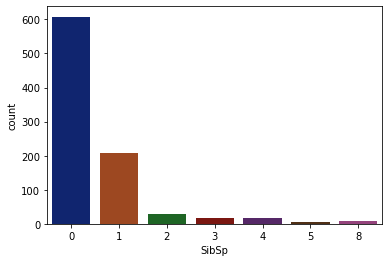

In [162]:
sea.countplot(x="SibSp", data=titanic_data, palette="dark")
#tells us about about the people with the number of spouses or siblings

In [163]:
titanic_data.info()
#this gives you all of the information regarding each and every class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Data Wrangling

In [164]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [165]:
#find the total number of null values in the given data for each subclass
titanic_data.isnull().sum()
#it tells us that age has about 177 null values and cabin class has about 687 null values in total

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

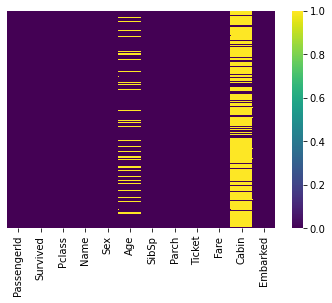

In [166]:
sea.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")
#the yellow part represent the null values in the respective subclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

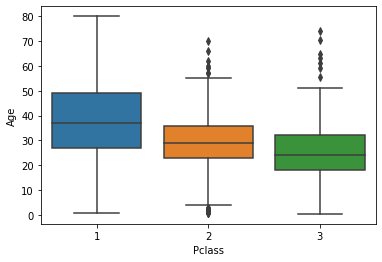

In [167]:
sea.boxplot(x="Pclass", y="Age", data=titanic_data)
#tells that class 3 had the youngest people

In [168]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
#we need to first remove the cabin column bc it had the most no. of null vals
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [177]:
titanic_data.dropna(inplace=True)

In [178]:
titanic_data.isnull().sum()
#no null value left

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

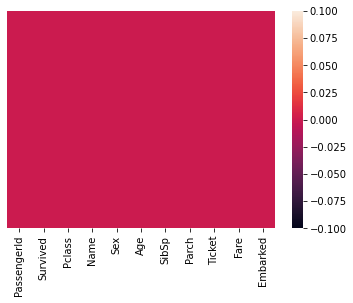

In [179]:
sea.heatmap(titanic_data.isnull(), yticklabels=False)
#no null value left

In [180]:
sexx=pd.get_dummies(titanic_data["Sex"], drop_first=True)
sexx.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [181]:
embark=pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head(6)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
6,0,1


In [182]:
shipclass=pd.get_dummies(titanic_data["Pclass"], drop_first=True)
shipclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [192]:
titanic_data.head(5)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [193]:
titanic_data.drop("PassengerId", axis=1, inplace=True)

In [194]:
titanic_data.head(5)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [196]:
titanic_data=pd.concat([titanic_data, sexx, shipclass, embark], axis=1)
#already added

NameError: name 'itanic_data' is not defined

In [197]:
titanic_data.head(5)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,2,3,Q,S
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


In [198]:
titanic_data.drop("Name", axis=1, inplace=True)

In [199]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Ticket,Fare,male,2,3,Q,S
0,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,0,0,1
4,0,35.0,0,0,373450,8.0500,1,0,1,0,1


In [200]:
titanic_data.drop("Ticket", axis=1, inplace=True)
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


## 3. training and testing data

In [205]:
y=titanic_data["Survived"]


In [206]:
x=titanic_data.drop("Survived", axis=1)

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [214]:
x_train, x_test, y_Train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [215]:
logmodel=LogisticRegression()

In [216]:
logmodel.fit(x_train, y_Train)

C:\Users\GEETA\Anaconda33\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [217]:
predictions=logmodel.predict(x_test)

In [218]:
confusion=confusion_matrix(predictions, y_test)


In [219]:
print(confusion)

[[102  25]
 [ 24  63]]


In [220]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [222]:
accuracy=accuracy_score(y_test, predictions)
print(accuracy*100)

77.10280373831776
